<a href="https://colab.research.google.com/github/impratyasha-07/upgraded-waffle/blob/main/LightGBM_CatBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 LightGBM & CatBoost Regressor — Training & Evaluation

In [ ]:
!pip install lightgbm catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from google.colab import files
uploaded = files.upload()
# Load your dataset
df = pd.read_csv("Cleaned_Dataset_With_Scaled_Intensity_AgeGroup5yr.csv")
print(df.head())

features = [
    'age', 'gender', 'height', 'weight', 'bmi',
    'duration', 'Scaled_Intensity_Index', 'heart_rate'
]
target = 'calories'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# LightGBM
lgbm = LGBMRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_lgbm)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
r2 = r2_score(y_test, y_pred_lgbm)
std_dev = np.std(y_test - y_pred_lgbm)

print(f"✅ LightGBM -> MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}, Std Dev: {std_dev:.2f}")

# CatBoost
cat = CatBoostRegressor(iterations=300, learning_rate=0.05, depth=5, verbose=0, random_state=42)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_cat)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_cat))
r2 = r2_score(y_test, y_pred_cat)
std_dev = np.std(y_test - y_pred_cat)

print(f"✅ CatBoost -> MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}, Std Dev: {std_dev:.2f}")


Saving Cleaned_Dataset_With_Scaled_Intensity_AgeGroup5yr.csv to Cleaned_Dataset_With_Scaled_Intensity_AgeGroup5yr.csv
   age age_group        bmi bmi_category  calories  duration  gender  \
0   45     45-47  21.926126       Normal     173.0      26.0       1   
1   21     21-23  25.737081   Overweight     189.0      29.0       0   
2   58     57-59  24.857955       Normal      53.0      11.0       0   
3   35     33-35  26.868736   Overweight     161.0      24.0       0   
4   67     66-68  22.913033       Normal     226.0      29.0       1   

   heart_rate  height  weight  ...  Calories_per_BMI  Fitness_Level  \
0       107.0   154.0    52.0  ...          7.890131              1   
1       111.0   187.0    90.0  ...          7.343490              2   
2        90.0   176.0    77.0  ...          2.132114              1   
3       108.0   182.0    89.0  ...          5.992094              2   
4       116.0   171.0    67.0  ...          9.863382              1   

   Heart_Rate_Bin  Gen

In [ ]:
# ✅ Install missing packages in Colab
!pip install catboost xgboost lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00


Saving Cleaned_Dataset_With_Scaled_Intensity_AgeGroup5yr.csv to Cleaned_Dataset_With_Scaled_Intensity_AgeGroup5yr (3).csv
   age age_group        bmi bmi_category  calories  duration  gender  \
0   45     45-47  21.926126       Normal     173.0      26.0       1   
1   21     21-23  25.737081   Overweight     189.0      29.0       0   
2   58     57-59  24.857955       Normal      53.0      11.0       0   
3   35     33-35  26.868736   Overweight     161.0      24.0       0   
4   67     66-68  22.913033       Normal     226.0      29.0       1   

   heart_rate  height  weight  ...  Calories_per_BMI  Fitness_Level  \
0       107.0   154.0    52.0  ...          7.890131              1   
1       111.0   187.0    90.0  ...          7.343490              2   
2        90.0   176.0    77.0  ...          2.132114              1   
3       108.0   182.0    89.0  ...          5.992094              2   
4       116.0   171.0    67.0  ...          9.863382              1   

   Heart_Rate_Bin 

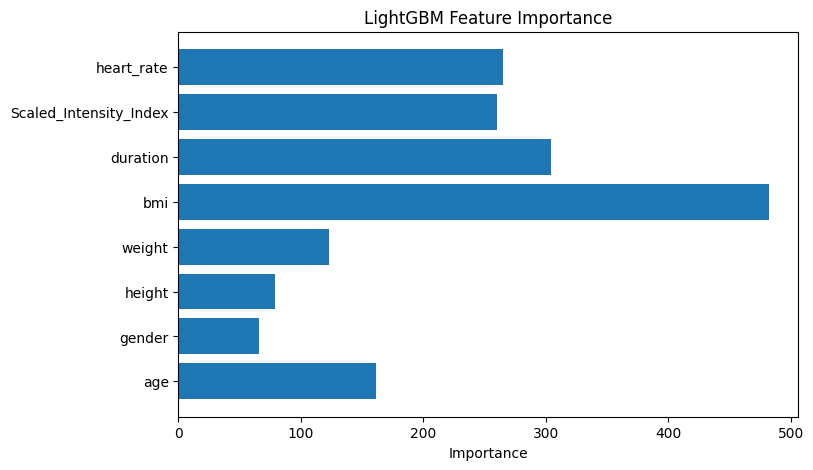

0:	learn: 288.7450725	test: 280.5827731	best: 280.5827731 (0)	total: 51.1ms	remaining: 1m 42s
100:	learn: 194.3719218	test: 193.5108100	best: 193.4463449 (98)	total: 397ms	remaining: 7.47s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 193.4463449
bestIteration = 98

Shrink model to first 99 iterations.
✅ CatBoost -> MAE: 133.36, RMSE: 193.45, R²: 0.5488
[0]	validation_0-mae:241.51280
[100]	validation_0-mae:132.76748
[197]	validation_0-mae:133.03420
✅ XGBoost -> MAE: 132.66, RMSE: 196.92, R²: 0.5325
✅ Ensemble -> MAE: 133.63, RMSE: 193.07, R²: 0.5506


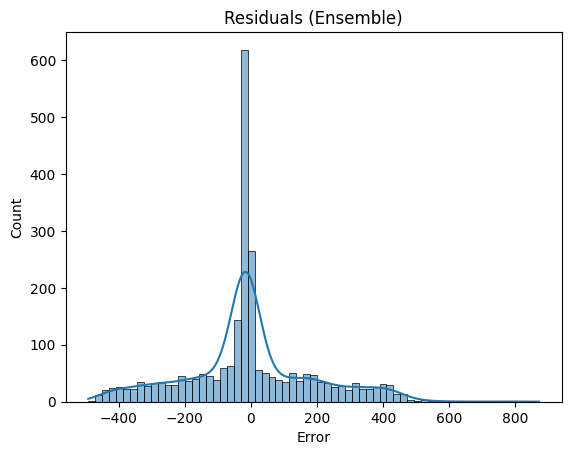

In [ ]:
# 📌 1️⃣ Imports & Setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from xgboost import XGBRegressor

# 📌 2️⃣ Upload your dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Cleaned_Dataset_With_Scaled_Intensity_AgeGroup5yr.csv")
print(df.head())

features = [
    'age', 'gender', 'height', 'weight', 'bmi',
    'duration', 'Scaled_Intensity_Index', 'heart_rate'
]
target = 'calories'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ✅ LightGBM with early stopping
lgbm = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=7,
    random_state=42
)

# Use callbacks instead
from lightgbm import early_stopping, log_evaluation

lgbm.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='l1',
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=50)
    ]
)


# ✅ Make predictions
y_pred_lgbm = lgbm.predict(X_test)


mae = mean_absolute_error(y_test, y_pred_lgbm)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
r2 = r2_score(y_test, y_pred_lgbm)
print(f"✅ LightGBM -> MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

# 📌 4️⃣ Feature importance plot (LightGBM)
importances = lgbm.feature_importances_
plt.figure(figsize=(8,5))
plt.barh(features, importances)
plt.title("LightGBM Feature Importance")
plt.xlabel("Importance")
plt.show()

# 📌 5️⃣ CatBoost
cat = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.05,
    depth=7,
    early_stopping_rounds=50,
    verbose=100,
    random_state=42
)

cat.fit(
    X_train, y_train,
    eval_set=(X_test, y_test)
)

y_pred_cat = cat.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_cat)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_cat))
r2 = r2_score(y_test, y_pred_cat)
print(f"✅ CatBoost -> MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

# 📌 6️⃣ XGBoost
xgb = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    max_depth=7,
    early_stopping_rounds=50,
    eval_metric='mae',
    random_state=42
)

xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=100
)

y_pred_xgb = xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)
print(f"✅ XGBoost -> MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

# 📌 7️⃣ Ensemble
y_pred_ensemble = (
    0.4 * y_pred_lgbm +
    0.4 * y_pred_cat +
    0.2 * y_pred_xgb
)

mae = mean_absolute_error(y_test, y_pred_ensemble)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))
r2 = r2_score(y_test, y_pred_ensemble)
print(f"✅ Ensemble -> MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

# 📌 8️⃣ Residual plot
residuals = y_test - y_pred_ensemble
sns.histplot(residuals, kde=True)
plt.title("Residuals (Ensemble)")
plt.xlabel("Error")
plt.show()


In [ ]:
# ✅ FINAL MODEL SAVE NOTEBOOK

# 1️⃣ Load everything you need
import pandas as pd
import joblib
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 2️⃣ Assume you already have: X_train, y_train, X_test, y_test

# 3️⃣ Retrain the best models (or load them)
lgbm = LGBMRegressor()
catboost = CatBoostRegressor(verbose=0)
xgb = XGBRegressor()

lgbm.fit(X_train, y_train)
catboost.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# 4️⃣ Build final ensemble
ensemble = VotingRegressor([
    ('lgbm', lgbm),
    ('catboost', catboost),
    ('xgb', xgb)
])

ensemble.fit(X_train, y_train)

# 5️⃣ Save all models
joblib.dump(lgbm, 'lgbm_final_model.pkl')
joblib.dump(catboost, 'catboost_final_model.pkl')
joblib.dump(xgb, 'xgb_final_model.pkl')
joblib.dump(ensemble, 'ensemble_final_model.pkl')

# 6️⃣ If you scaled/encoded, save that too!
# e.g., joblib.dump(scaler, 'scaler.pkl')

print("✅ All models saved successfully.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 9873, number of used features: 8
[LightGBM] [Info] Start training from score 346.351055
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000902 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 9873, number of used features: 8
[LightGBM] [Info] Start training from score 346.351055
✅ All models saved successfully.


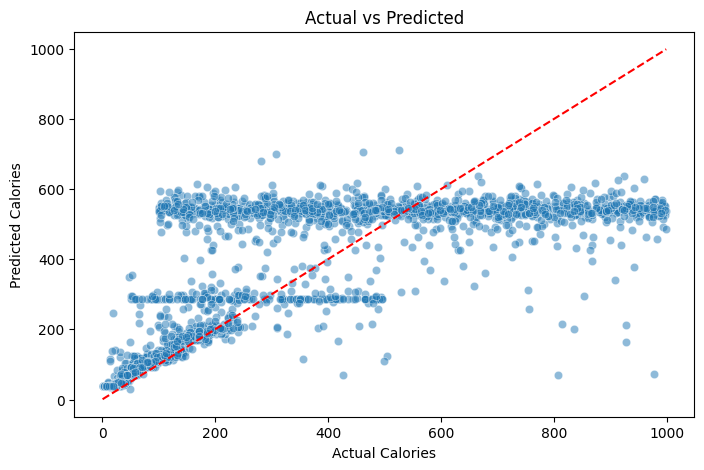

       age  gender  height  weight        bmi  duration  \
7589    47       1   182.0    90.0  27.170632      11.0   
9811    28       1   178.0    70.0  22.093170      20.0   
7233    22       1   163.0    69.0  25.970116      25.0   
5972    41       0   158.0    58.0  23.233456      10.0   
9176    49       1   159.0    63.0  24.919900      27.0   
5739    39       1   161.0    61.0  23.533043      28.0   
12157   45       0   186.0    81.0  23.413111      11.0   
9638    21       1   176.0    65.0  20.983988      17.0   
9727    40       1   181.0    85.0  25.945484      30.0   
5027    24       1   166.0    51.0  18.507766      16.0   

       Scaled_Intensity_Index  heart_rate  Actual   Predicted       Error  
7589                 3.579493        96.0   976.0   74.264890  872.623121  
9811                 2.776186       108.0   927.0  163.702541  769.496953  
7233                 2.302472        94.0   926.0  212.176583  736.577978  
5972                 2.976069        88.0   80

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect line
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted")
plt.show()
# Show a few big errors
test_df = X_test.copy()
test_df['Actual'] = y_test
test_df['Predicted'] = y_pred
test_df['Error'] = residuals

big_errors = test_df.reindex(test_df.Error.abs().sort_values(ascending=False).index)
print(big_errors.head(10))


In [ ]:
import joblib

# Example: Save LightGBM model
joblib.dump(lgbm, 'lightgbm_calorie_model.pkl')

# Example: Save CatBoost model
joblib.dump(catboost, 'catboost_calorie_model.pkl')

# Example: Save XGBoost model
joblib.dump(xgb, 'xgboost_calorie_model.pkl')

# Example: Save the ensemble model
joblib.dump(ensemble, 'ensemble_calorie_model.pkl')

print("✅ Models saved successfully!")


✅ Models saved successfully!


In [ ]:
from google.colab import files

# Download your final choice
files.download('ensemble_calorie_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

# Load it back anytime
loaded_model = joblib.load('ensemble_calorie_model.pkl')

# Predict example
pred = loaded_model.predict(X_test)


In [14]:
# 📌 1️⃣ Install any missing libraries
!pip install lightgbm catboost scikit-learn --quiet

# 📌 2️⃣ Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

import joblib

# 📌 3️⃣ Load your dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Cleaned_Dataset_With_Scaled_Intensity_AgeGroup5yr.csv")
print(df.head())

features = [
    'age', 'gender', 'height', 'weight', 'bmi',
    'duration', 'Scaled_Intensity_Index', 'heart_rate'
]
target = 'calories'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# 📌 6️⃣ Initialize models
lgbm = LGBMRegressor(n_estimators=100, random_state=42)
cat = CatBoostRegressor(
    iterations=100,
    verbose=0,
    random_state=42
)
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

# 📌 7️⃣ Train models
lgbm.fit(X_train, y_train)
cat.fit(X_train, y_train)
gbr.fit(X_train, y_train)

# 📌 8️⃣ Make predictions
lgbm_preds = lgbm.predict(X_test)
cat_preds = cat.predict(X_test)
gbr_preds = gbr.predict(X_test)

# 📌 9️⃣ Weighted average ensemble
# Example: equal weights. Adjust if needed!
ensemble_preds = (
    0.33 * lgbm_preds +
    0.33 * cat_preds +
    0.34 * gbr_preds
)

# 📌 🔟 Evaluation function
def evaluate(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"✅ {name} -> MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

# 📌 Evaluate all
evaluate("LightGBM", y_test, lgbm_preds)
evaluate("CatBoost", y_test, cat_preds)
evaluate("GBR", y_test, gbr_preds)
evaluate("Ensemble", y_test, ensemble_preds)

# 📌 ✅ Save models to disk
joblib.dump(lgbm, "lgbm_model.pkl")
joblib.dump(cat, "catboost_model.pkl")
joblib.dump(gbr, "gbr_model.pkl")

print("\n✅ All models saved successfully!")


Saving Cleaned_Dataset_With_Scaled_Intensity_AgeGroup5yr.csv to Cleaned_Dataset_With_Scaled_Intensity_AgeGroup5yr (4).csv
   age age_group        bmi bmi_category  calories  duration  gender  \
0   45     45-47  21.926126       Normal     173.0      26.0       1   
1   21     21-23  25.737081   Overweight     189.0      29.0       0   
2   58     57-59  24.857955       Normal      53.0      11.0       0   
3   35     33-35  26.868736   Overweight     161.0      24.0       0   
4   67     66-68  22.913033       Normal     226.0      29.0       1   

   heart_rate  height  weight  ...  Calories_per_BMI  Fitness_Level  \
0       107.0   154.0    52.0  ...          7.890131              1   
1       111.0   187.0    90.0  ...          7.343490              2   
2        90.0   176.0    77.0  ...          2.132114              1   
3       108.0   182.0    89.0  ...          5.992094              2   
4       116.0   171.0    67.0  ...          9.863382              1   

   Heart_Rate_Bin 